<a href="https://colab.research.google.com/github/MehdiBenSalah/Lung_Nodule_Detection_And_3D_Reconstruction/blob/main/unetmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

from tensorflow import keras

In [ ]:
# Define constants
SEED = 909
BATCH_SIZE_TRAIN = 8
BATCH_SIZE_VAL = 8
BATCH_SIZE_TEST = 8

IMAGE_HEIGHT = 512
IMAGE_WIDTH = 512
IMG_SIZE = (IMAGE_HEIGHT, IMAGE_WIDTH)

#data_dir = 'C:/Users/USER/Downloads/PNG_Norm_luna_img_mask/'
data_dir = '/content/drive/MyDrive/PNG_Norm_luna_img_mask/'

data_dir_train = os.path.join(data_dir, 'train')
# The images should be stored under: "data/slices/training/img/img"
data_dir_train_image = os.path.join(data_dir_train, 'images/')
# The images should be stored under: "data/slices/training/mask/img"
data_dir_train_mask = os.path.join(data_dir_train, 'labels/')

data_dir_test = os.path.join(data_dir, 'test')
# The images should be stored under: "data/slices/test/img/img"
data_dir_test_image = os.path.join(data_dir_test, 'images')
# The images should be stored under: "data/slices/test/mask/img"
data_dir_test_mask = os.path.join(data_dir_test, 'labels')

data_dir_val = os.path.join(data_dir, 'val')
# The images should be stored under: "data/slices/test/img/img"
data_dir_val_image = os.path.join(data_dir_val, 'images')
# The images should be stored under: "data/slices/test/mask/img"
data_dir_val_mask = os.path.join(data_dir_val, 'labels')

NUM_TRAIN = 837
NUM_VAL = 229
NUM_TEST = 100

NUM_OF_EPOCHS = 50

In [ ]:
def create_segmentation_generator_train(img_path, msk_path, BATCH_SIZE):
    data_gen_args = dict(rescale=1./255
#                      featurewise_center=True,
#                      featurewise_std_normalization=True,
#                      rotation_range=90
#                      width_shift_range=0.2,
#                      height_shift_range=0.2,
#                      zoom_range=0.3
                      )
    datagen = ImageDataGenerator(**data_gen_args)
    
    img_generator = datagen.flow_from_directory(img_path, target_size=IMG_SIZE, class_mode=None, color_mode='grayscale', batch_size=BATCH_SIZE, seed=SEED)
    msk_generator = datagen.flow_from_directory(msk_path, target_size=IMG_SIZE, class_mode=None, color_mode='grayscale', batch_size=BATCH_SIZE, seed=SEED)
    return zip(img_generator, msk_generator)

# Remember not to perform any image augmentation in the test generator!
def create_segmentation_generator_val(img_path, msk_path, BATCH_SIZE):
    data_gen_args = dict(rescale=1./255)
    datagen = ImageDataGenerator(**data_gen_args)
    
    img_generator = datagen.flow_from_directory(img_path, target_size=IMG_SIZE, class_mode=None, color_mode='grayscale', batch_size=BATCH_SIZE, seed=SEED)
    msk_generator = datagen.flow_from_directory(msk_path, target_size=IMG_SIZE, class_mode=None, color_mode='grayscale', batch_size=BATCH_SIZE, seed=SEED)
    return zip(img_generator, msk_generator)

def create_segmentation_generator_test(img_path, msk_path, BATCH_SIZE):
    data_gen_args = dict(rescale=1./255)
    datagen = ImageDataGenerator(**data_gen_args)
    
    img_generator = datagen.flow_from_directory(img_path, target_size=IMG_SIZE, class_mode=None, color_mode='grayscale', batch_size=BATCH_SIZE, seed=SEED)
    msk_generator = datagen.flow_from_directory(msk_path, target_size=IMG_SIZE, class_mode=None, color_mode='grayscale', batch_size=BATCH_SIZE, seed=SEED)
    return zip(img_generator, msk_generator)

In [ ]:
train_generator = create_segmentation_generator_train(data_dir_train_image, data_dir_train_mask, BATCH_SIZE_TRAIN)
val_generator = create_segmentation_generator_val(data_dir_val_image, data_dir_val_mask, BATCH_SIZE_VAL)
test_generator = create_segmentation_generator_test(data_dir_test_image, data_dir_test_mask, BATCH_SIZE_TEST)

Found 837 images belonging to 1 classes.
Found 837 images belonging to 1 classes.
Found 229 images belonging to 1 classes.
Found 229 images belonging to 1 classes.
Found 100 images belonging to 1 classes.
Found 100 images belonging to 1 classes.


In [ ]:
def display(display_list):
    plt.figure(figsize=(20,20))
    
    title = ['Input Image', 'True Mask','Segmented Nodule', 'Predicted Mask','Predicted Segmented Nodule']
    
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]), cmap='gray')
    plt.show()

In [ ]:
def show_dataset(datagen, num=1):
    for i in range(0,num):
        image,mask = next(datagen)
        display([image[0], mask[0],image[0]*mask[0]])

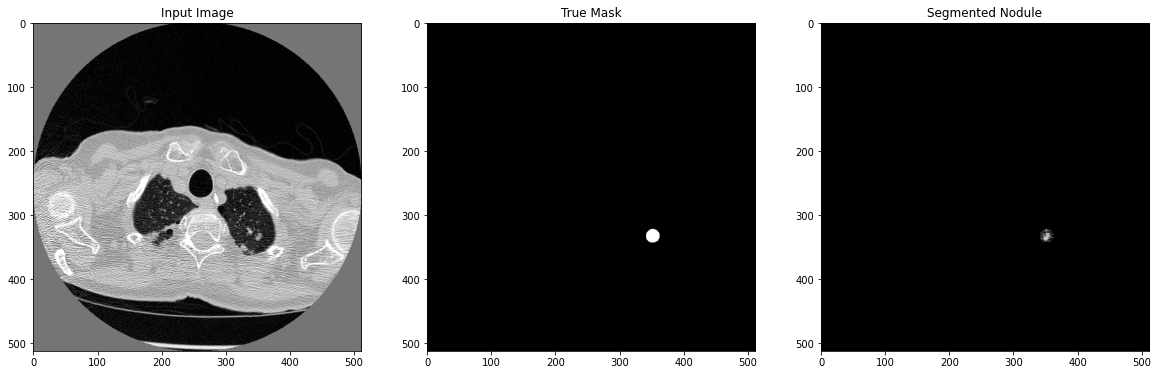

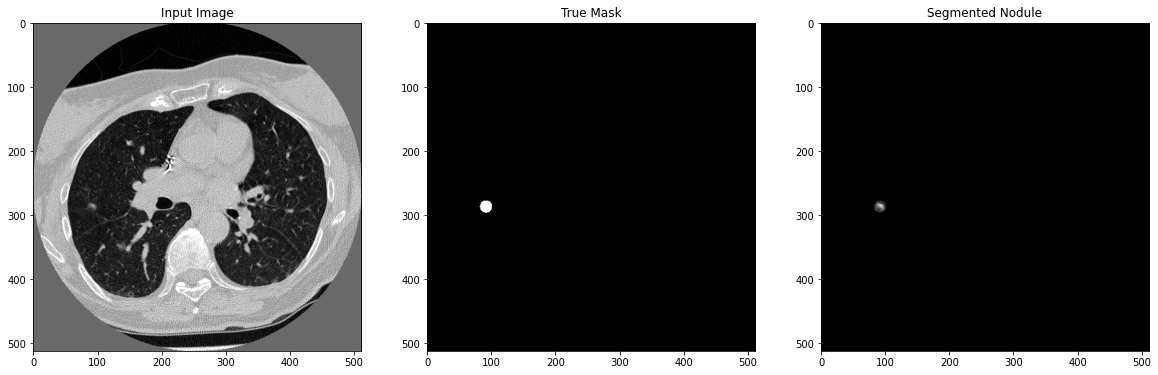

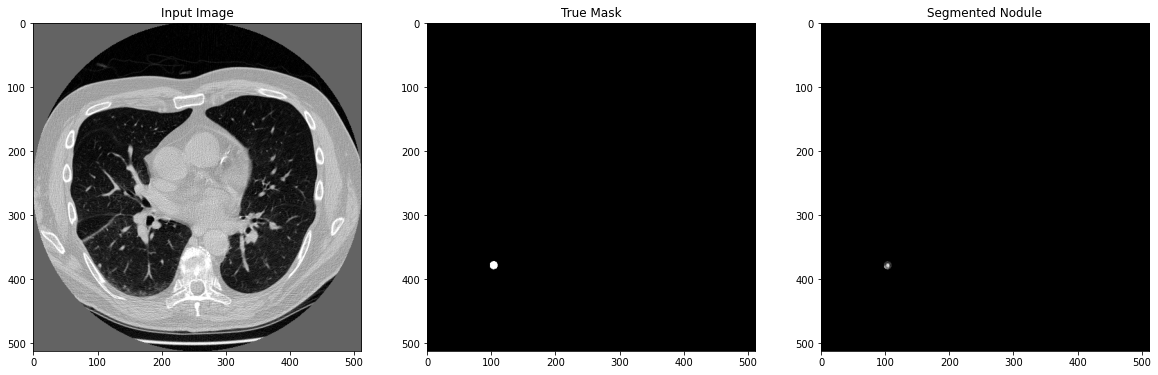

In [ ]:
show_dataset(train_generator, 3)

In [ ]:
!pip install keras-unet

In [ ]:
from keras_unet.models import custom_unet
model = custom_unet(
    input_shape=(512, 512, 1),
    use_batch_norm=False,
    num_classes=1,
    filters=64,
    dropout=0.2,
    output_activation='sigmoid')
model.summary()

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 512, 512, 64) 640         input_1[0][0]                    
__________________________________________________________________________________________________
spatial_dropout2d (SpatialDropo (None, 512, 512, 64) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)              

In [ ]:
EPOCH_STEP_TRAIN = NUM_TRAIN // BATCH_SIZE_TRAIN
EPOCH_STEP_VAL = NUM_VAL // BATCH_SIZE_VAL


NUM_OF_EPOCHS = 50
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit_generator(generator=train_generator, 
                    steps_per_epoch=EPOCH_STEP_TRAIN, 
                    validation_data=val_generator, 
                    validation_steps=EPOCH_STEP_VAL,
                   epochs=NUM_OF_EPOCHS)

In [ ]:
h5_path = '/content/drive/MyDrive/UNETModelsPFA/batch8_fit.generator_epochs50'
model.save(h5_path)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/UNETModelsPFA/OPT_ClearedDataset_batch8_fit.generator_epochs50/assets


In [ ]:
test_generator = create_segmentation_generator_test(data_dir_test_image, data_dir_test_mask, 1)

Found 100 images belonging to 1 classes.
Found 100 images belonging to 1 classes.


In [ ]:
def show_prediction(datagen, num=1):
    for i in range(0,num):
        image,mask = next(datagen)
        pred_mask = model.predict(image)[0] >0.5
        #> 0.5
        display([image[0], mask[0],image[0]*mask[0], pred_mask,image[0]*pred_mask])


In [ ]:
model_1 = keras.models.load_model('/content/drive/MyDrive/UNETModelsPFA/batch8_fit.generator_epochs50')
model_2 = keras.models.load_model('/content/drive/MyDrive/UNETModelsPFA/ClearedDataset_batch8_fit.generator_epochs50')
model_3 = keras.models.load_model('/content/drive/MyDrive/UNETModelsPFA/ClearedDataset_batch8_fit.generator_epochs100')
model_4 = keras.models.load_model('/content/drive/MyDrive/UNETModelsPFA/OPT_ClearedDataset_batch8_fit.generator_epochs50')

test_generator = create_segmentation_generator_test(data_dir_test_image, data_dir_test_mask, 1)

Found 100 images belonging to 1 classes.
Found 100 images belonging to 1 classes.


In [ ]:
def show_prediction_model(datagen,model_i, num=30):
    for i in range (0,num):
      print(i) 
      image,mask = next(datagen)
      pred_mask = model_i.predict(image)[0] >0.5
      display([image[0], mask[0],image[0]*mask[0], pred_mask,image[0]*pred_mask])

0


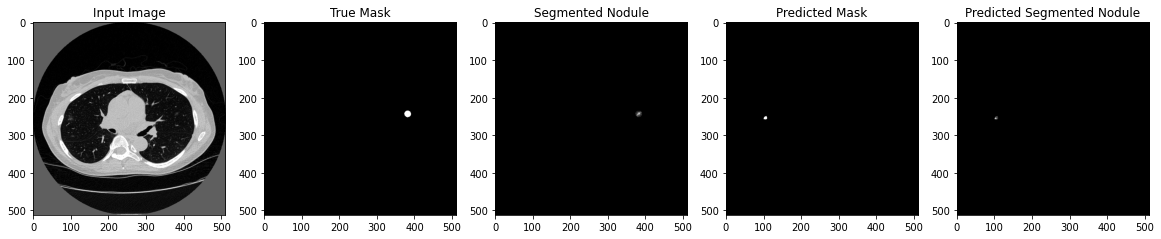

1


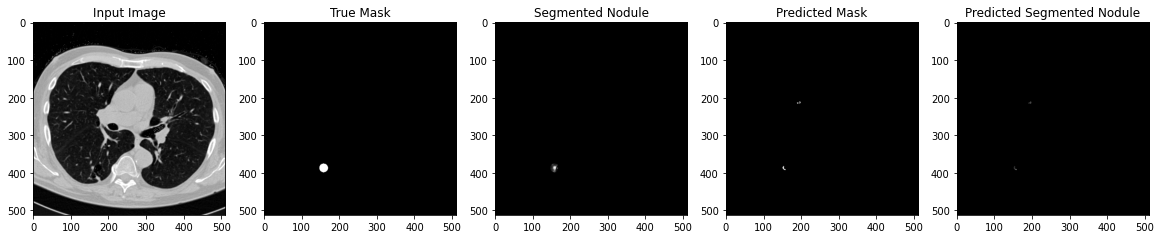

2


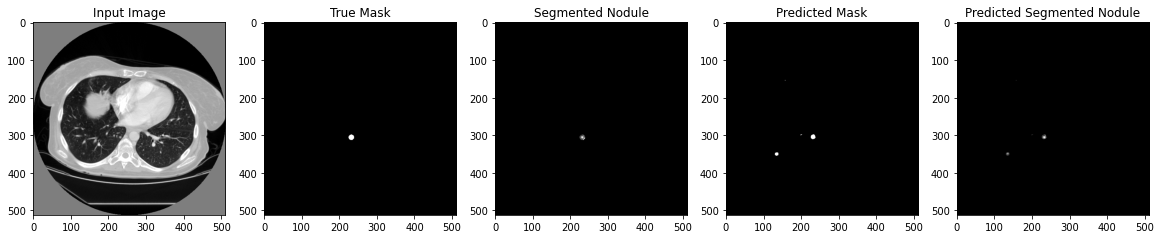

3


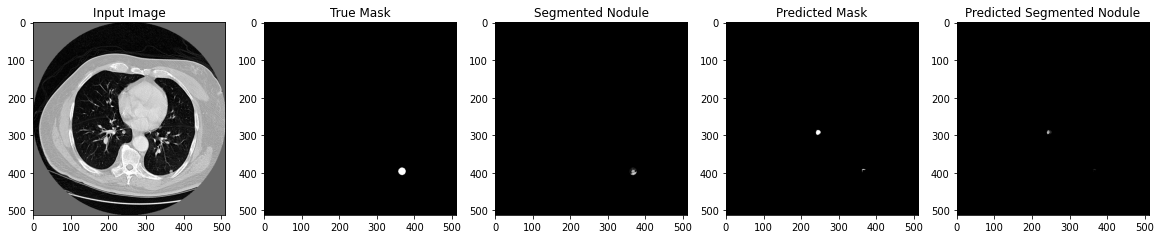

4


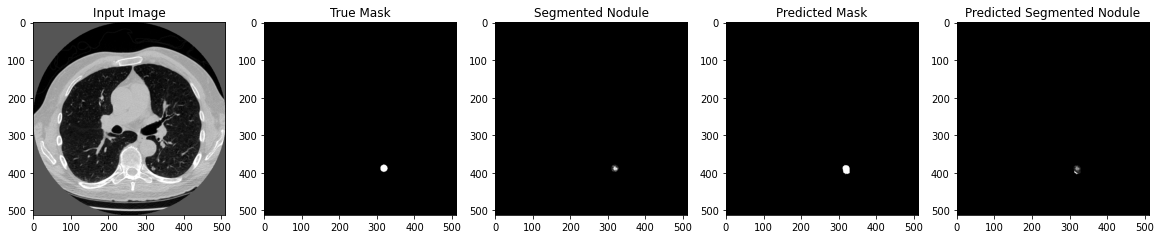

5


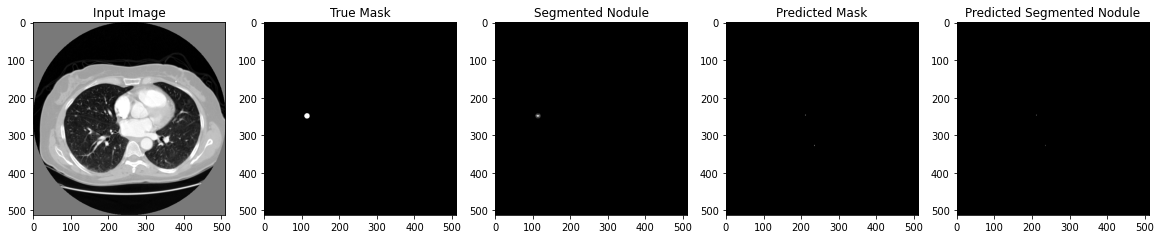

6


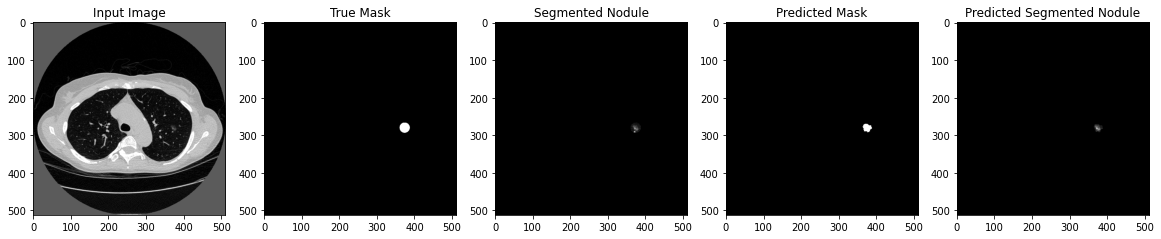

7


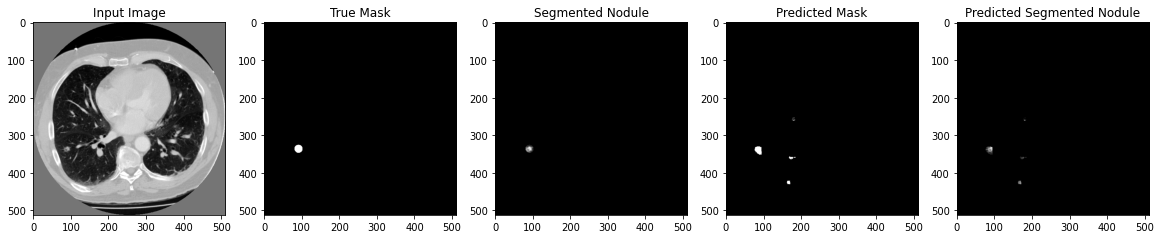

8


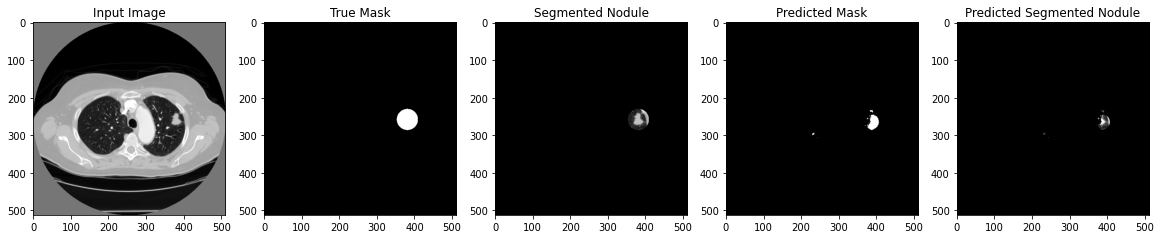

9


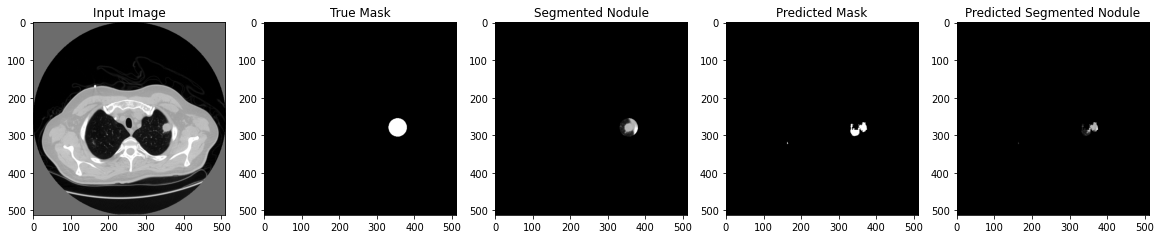

10


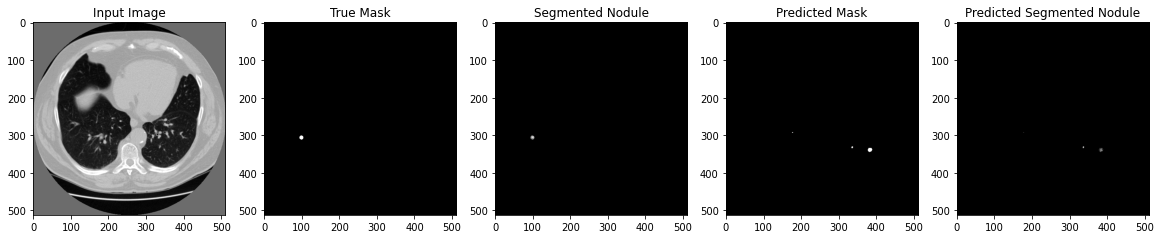

11


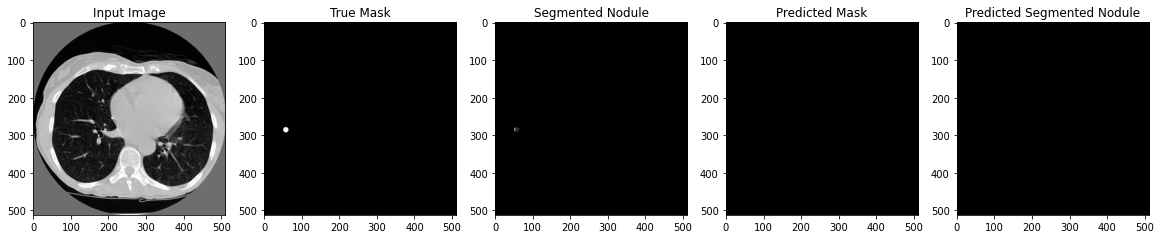

12


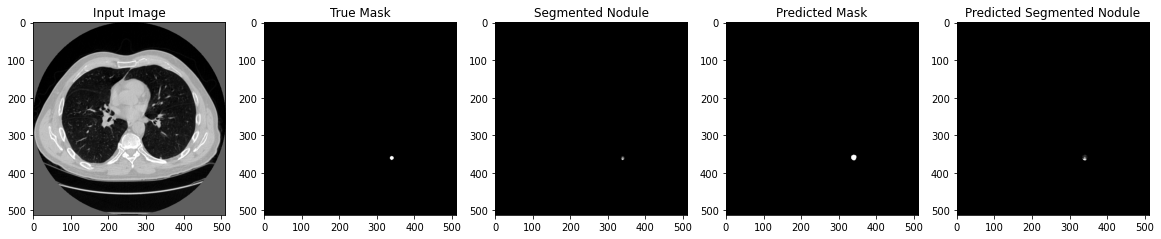

13


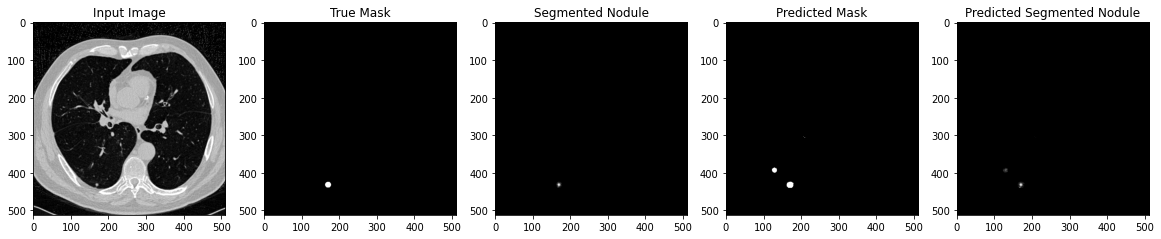

14


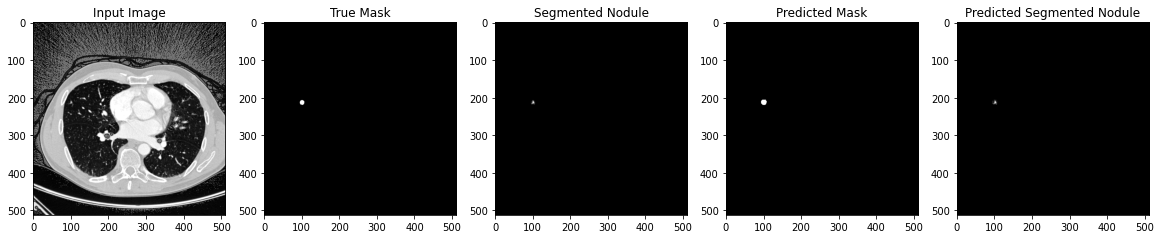

15


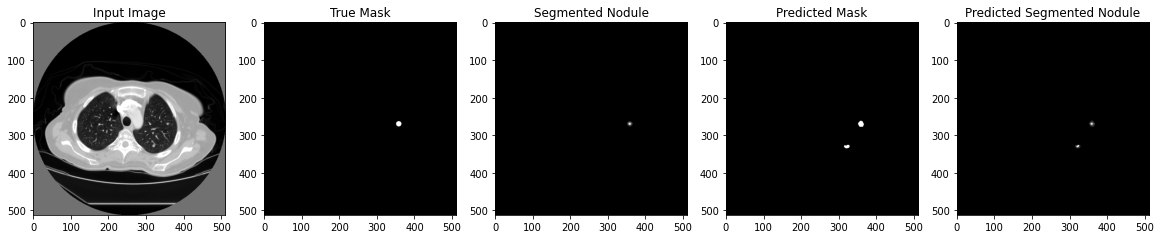

16


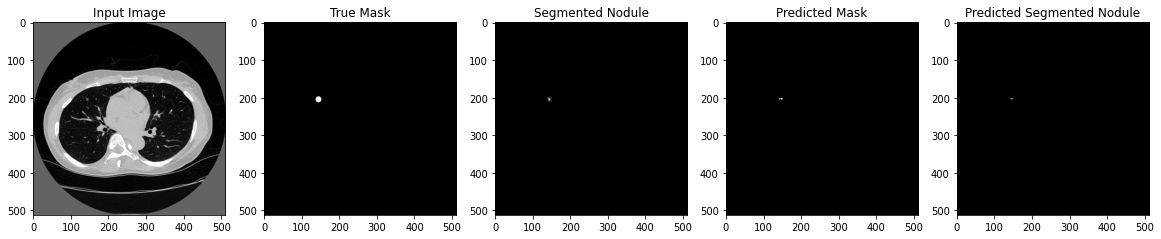

17


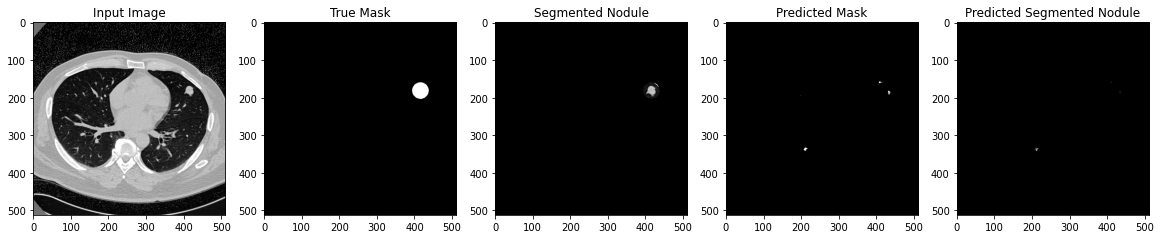

18


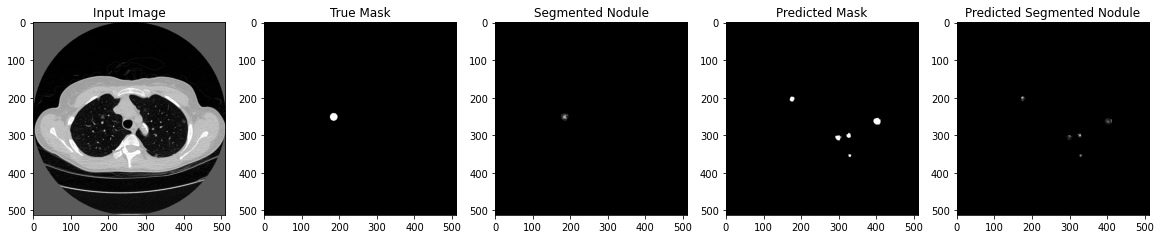

19


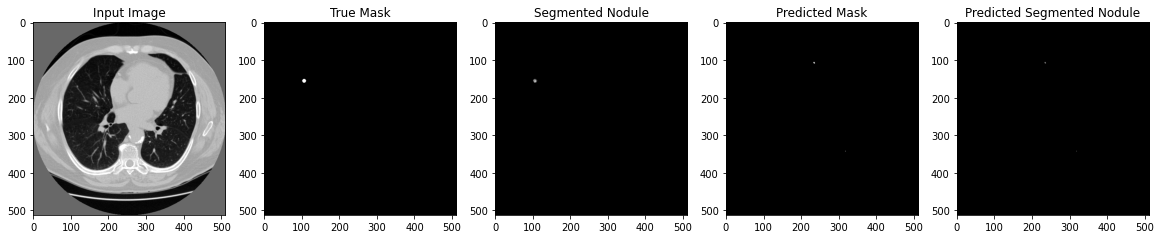

20


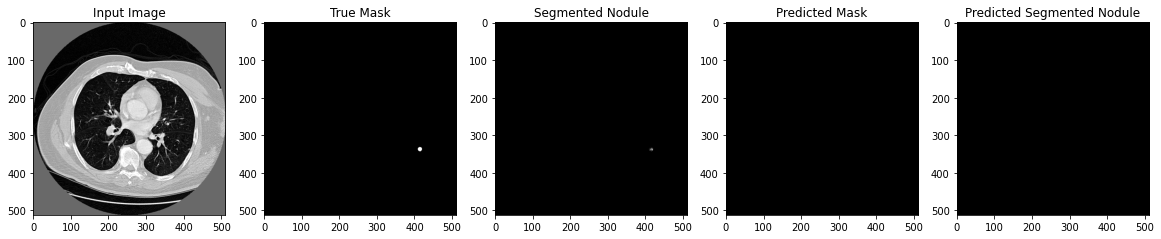

21


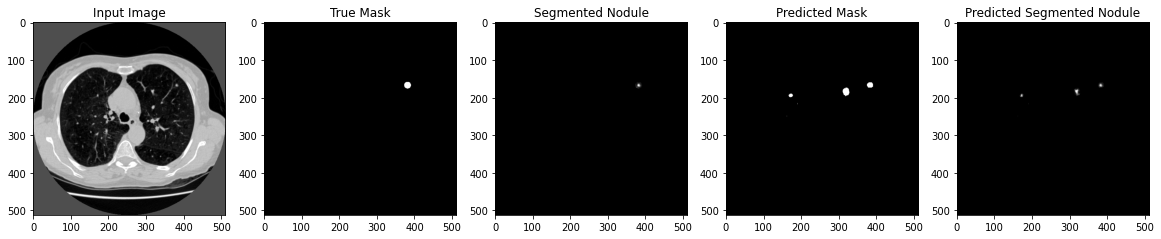

22


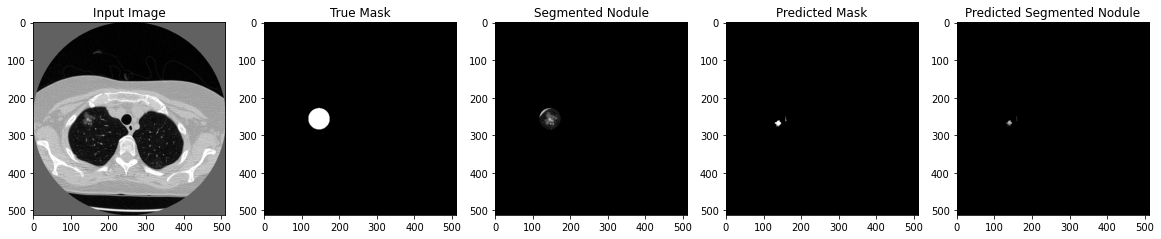

23


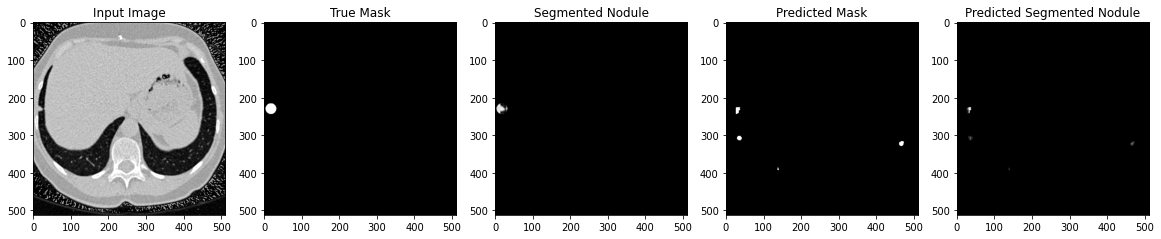

24


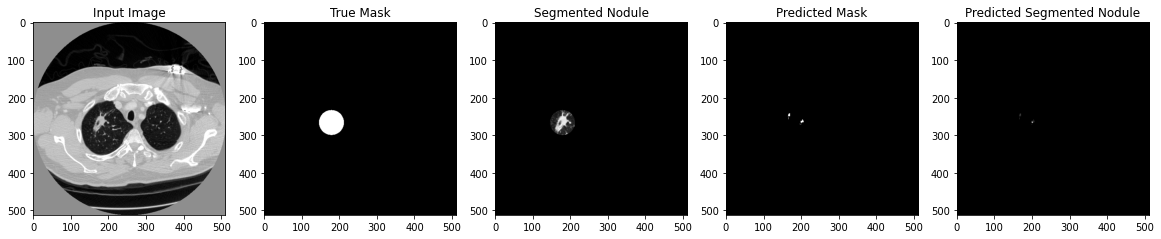

25


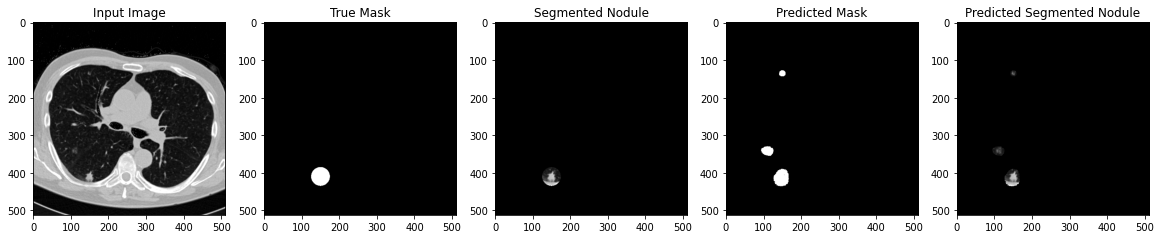

26


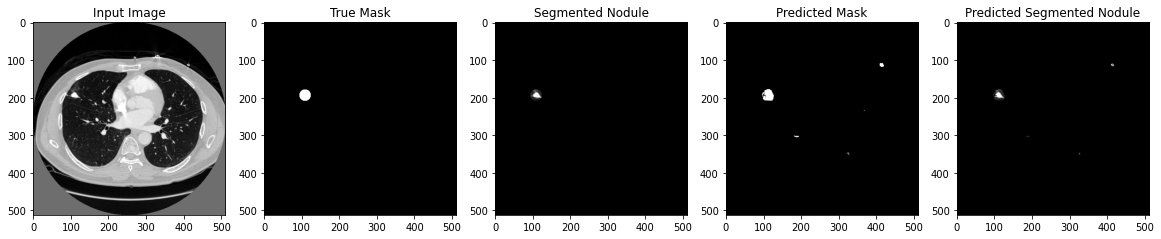

27


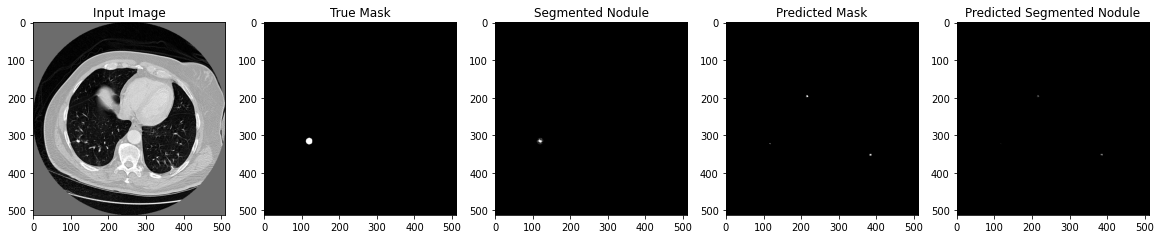

28


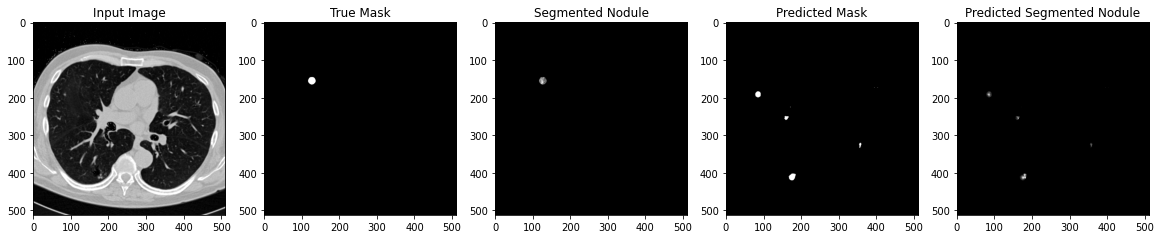

29


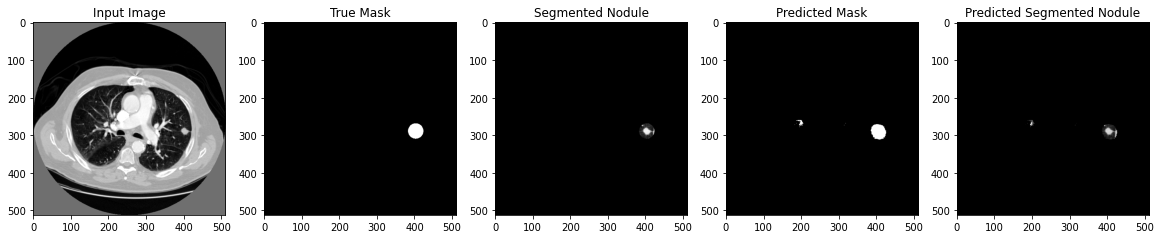

In [ ]:
show_prediction_model(test_generator,model_1)